In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

##Digit Recognition

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/MLOA/digit_recognizer_data/train.csv") 
test_data = pd.read_csv("/content/drive/MyDrive/MLOA/digit_recognizer_data/test.csv")

####EDA

In [ ]:
train_data.shape

(42000, 785)

In [ ]:
test_data.shape

(28000, 784)

In [ ]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data.isnull().sum().head(10)

label     0
pixel0    0
pixel1    0
pixel2    0
pixel3    0
pixel4    0
pixel5    0
pixel6    0
pixel7    0
pixel8    0
dtype: int64

In [ ]:
test_data.isnull().sum().head(10)

pixel0    0
pixel1    0
pixel2    0
pixel3    0
pixel4    0
pixel5    0
pixel6    0
pixel7    0
pixel8    0
pixel9    0
dtype: int64

In [ ]:
train_data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [ ]:
test_data.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Digits to be classified
order= list(np.sort(train_data['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


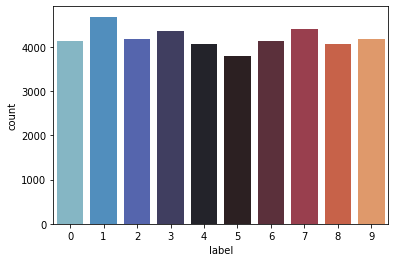

In [ ]:
sns.countplot(train_data['label'], palette = 'icefire')

Text(0.5, 1.0, 'Digit 6')

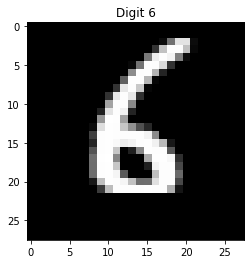

In [ ]:
six = train_data.iloc[45, 1:]
six.shape
six = six.values.reshape(28,28)
plt.imshow(six, cmap='gray')
plt.title("Digit 6")

In [ ]:
# average feature values
round(train_data.drop('label', axis=1).mean(), 2)

pixel0      0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
           ... 
pixel779    0.0
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
Length: 784, dtype: float64

In [ ]:
# avg values dont vary a lot but still rescaling
x= train_data.drop(columns='label')
y= train_data['label']

x= x/255
test_data= test_data/255

print("X:", x.shape)
print("test_data:", test_data.shape)

X: (42000, 784)
test_data: (28000, 784)


In [ ]:
from sklearn.preprocessing import scale
x_scaled= scale(x)

x_train, x_test, y_train, y_test= train_test_split(x_scaled, y, test_size= 0.3, train_size= 0.2, random_state= 10)


####PCA

In [ ]:
pca = PCA(n_components=.95)
pca.fit(x_train)

PCA(n_components=0.95)

In [ ]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [ ]:
print(f'train_img shape : {x_train_pca.shape}')
print(f'test_img shape : {x_test_pca.shape}')

train_img shape : (8400, 268)
test_img shape : (12600, 268)


####SVM

In [ ]:
model_linear= SVC(kernel= 'linear')
model_linear.fit(x_train_pca, y_train)

SVC(kernel='linear')

In [ ]:
y_pred= model_linear.predict(x_test_pca)

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9073015873015873 

[[1158    0    1    4    4    6   12    2    1    0]
 [   0 1382    3    4    3    0    0    4   17    0]
 [   7   16 1137   35   12    6   14   13   16    4]
 [   5    6   49 1194    0   47    2    3   20    5]
 [   2    3   18    4 1124    2   14    4    0   47]
 [  11   17   17   77    6  974   16    3   22    6]
 [  17    3   18    1   10   22 1146    1    1    0]
 [   5   12   17   19   20    2    0 1209    4   42]
 [   9   32   29   51    8   60   12    9  992   15]
 [   8    7    7   29   50    4    1   47    6 1116]]


In [ ]:
model_rbf= SVC(kernel='rbf')
model_rbf.fit(x_train_pca, y_train)
y_pred_rbf= model_rbf.predict(x_test_pca)

In [ ]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_rbf), "\n")
# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_rbf))

accuracy: 0.9348412698412698 

[[1156    0    5    1    0    2   12    6    5    1]
 [   0 1389    4    3    4    0    2    6    5    0]
 [   2    4 1170   19    5    0    9   35   15    1]
 [   1    4   19 1237    0   20    2   32   13    3]
 [   0    4   25    0 1133    0    9   17    3   27]
 [   1    9    5   42    3 1047   17   11    8    6]
 [  13    2    5    0    2   15 1156   24    2    0]
 [   3   10    9    3   15    0    0 1256    1   33]
 [   5   19   14   25    7   21    8   15 1095    8]
 [   4    4    6   30   23    2    1   61    4 1140]]


#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

accuracy = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_pca, y_train)
    
    prediction = knn.predict(x_test_pca)
    accuracy.append(metrics.accuracy_score(y_test, prediction))

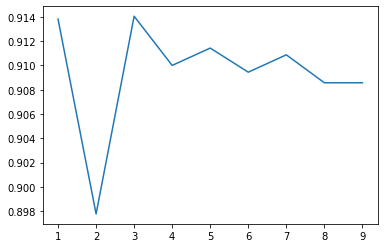

In [ ]:
plt.plot(range(1,10),accuracy)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_pca,y_train)

predictions = knn.predict(x_test_pca)
metrics.accuracy_score(y_test,predictions)

0.914047619047619

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1188
           1       0.93      0.99      0.96      1413
           2       0.93      0.89      0.91      1260
           3       0.88      0.93      0.90      1331
           4       0.92      0.90      0.91      1218
           5       0.90      0.88      0.89      1149
           6       0.94      0.95      0.94      1219
           7       0.92      0.90      0.91      1330
           8       0.95      0.83      0.89      1217
           9       0.87      0.87      0.87      1275

    accuracy                           0.91     12600
   macro avg       0.91      0.91      0.91     12600
weighted avg       0.91      0.91      0.91     12600



#### CNN

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [ ]:
#MODEL BUILD
model = Sequential()
model.add(Dense(128, activation='relu', input_dim= 268)) #784 colums
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax')) #10 class for classficatiom

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               34432     
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 38,890
Trainable params: 38,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = 'accuracy') 

In [ ]:
history = model.fit(x_train_pca, y_train, epochs = 20, validation_split= 0.25)

Epoch 1/20
197/197 [==============================] - 1s 4ms/step - loss: 0.9077 - accuracy: 0.7470 - val_loss: 0.4217 - val_accuracy: 0.8938
Epoch 2/20
197/197 [==============================] - 0s 2ms/step - loss: 0.2579 - accuracy: 0.9281 - val_loss: 0.3416 - val_accuracy: 0.9100
Epoch 3/20
197/197 [==============================] - 1s 3ms/step - loss: 0.1515 - accuracy: 0.9632 - val_loss: 0.3350 - val_accuracy: 0.9162
Epoch 4/20
197/197 [==============================] - 1s 3ms/step - loss: 0.0968 - accuracy: 0.9781 - val_loss: 0.3302 - val_accuracy: 0.9233
Epoch 5/20
197/197 [==============================] - 0s 2ms/step - loss: 0.0616 - accuracy: 0.9886 - val_loss: 0.3155 - val_accuracy: 0.9248
Epoch 6/20
197/197 [==============================] - 1s 3ms/step - loss: 0.0393 - accuracy: 0.9951 - val_loss: 0.3301 - val_accuracy: 0.9286
Epoch 7/20
197/197 [==============================] - 1s 3ms/step - loss: 0.0276 - accuracy: 0.9975 - val_loss: 0.3251 - val_accuracy: 0.9338
Epoch 

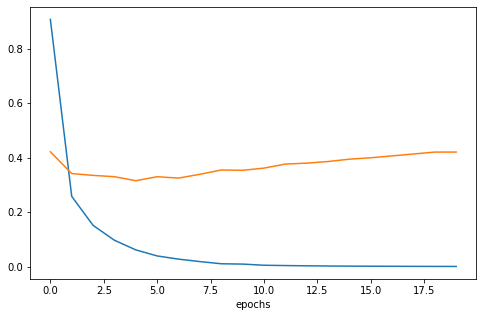

In [ ]:
# plotting the change in loss with epochs- 
plt.figure(figsize=(8,5))
plt.xlabel('epochs')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

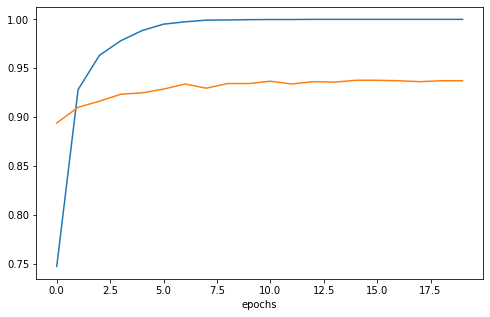

In [ ]:
# plotting the change in accuracy with epochs- 
plt.figure(figsize=(8,5))
plt.xlabel('epochs')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
#probilities
y_prob= model.predict(x_test_pca)

394/394 [==============================] - 1s 1ms/step


In [ ]:
y_pred_cnn= y_prob.argmax(axis=1)
y_pred_cnn

array([7, 3, 9, ..., 1, 0, 1])

In [ ]:
import sklearn.metrics as metrics
metrics.accuracy_score(y_true=y_test, y_pred=y_pred_cnn)

0.9312698412698412